In [20]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from functools import reduce
from IPython.display import display, Image

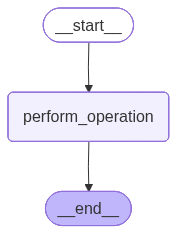

'Hi Animesh your answer is 10'

In [21]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: int

def add_multiply_numbers(state: AgentState) -> AgentState:
    """This method adds or multiplies numbers based on the operation specified in the state."""
    if state['operation'] == '+':
        state['result'] = sum(state['values'])
    elif state['operation'] == '*':
        state['result'] = reduce(lambda a, b: a * b, state['values'], 1)
    return state

graph = StateGraph(AgentState)
graph.add_node("perform_operation", add_multiply_numbers)
graph.add_edge(START, "perform_operation")
graph.add_edge("perform_operation", END)
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))
result = app.invoke({
    "name": "Animesh",
    "values": [1, 2, 3, 4],
    "operation": "+",})

f"Hi {result["name"]} your answer is {result["result"]}" # Should be 24